In [15]:
# Import dependencies
from bs4 import BeautifulSoup as bs
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Setup Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# URL of page to be scraped
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

In [3]:
# Confirm the HTML element to isolate the table info is present within the browser
browser.is_element_present_by_css("tr.data-row", 1)

True

In [4]:
# Create variables for browser.html to use as a Beautiful Soup object and parse out the webpage
weather = browser.html
weather_soup = bs(weather, "html.parser")

In [5]:
# Use the soup object to find the results for the HTML element
weather_results = weather_soup.find_all("tr", class_="data-row")

In [6]:
weather_row_list = []

In [7]:
for result in weather_results:
    mars_id = result.find_all("td")[0].text
    terr_date = result.find_all("td")[1].text
    sol = result.find_all("td")[2].text
    ls = result.find_all("td")[3].text
    month = result.find_all("td")[4].text
    min_temp = result.find_all("td")[5].text
    pressure = result.find_all("td")[6].text
    weather_row = [int(mars_id), terr_date, int(sol), int(ls), int(month), float(min_temp), float(pressure)]
    weather_row_list.append(weather_row)
    print(weather_row)

[2, '2012-08-16', 10, 155, 6, -75.0, 739.0]
[13, '2012-08-17', 11, 156, 6, -76.0, 740.0]
[24, '2012-08-18', 12, 156, 6, -76.0, 741.0]
[35, '2012-08-19', 13, 157, 6, -74.0, 732.0]
[46, '2012-08-20', 14, 157, 6, -74.0, 740.0]
[57, '2012-08-21', 15, 158, 6, -78.0, 740.0]
[68, '2012-08-22', 16, 158, 6, -77.0, 740.0]
[79, '2012-08-23', 17, 159, 6, -76.0, 742.0]
[112, '2012-08-27', 21, 161, 6, -74.0, 741.0]
[114, '2012-08-28', 22, 162, 6, -74.0, 742.0]
[123, '2012-08-29', 23, 162, 6, -75.0, 741.0]
[134, '2012-08-30', 24, 163, 6, -75.0, 742.0]
[145, '2012-08-31', 25, 163, 6, -75.0, 743.0]
[156, '2012-09-01', 26, 164, 6, -76.0, 745.0]
[163, '2012-09-02', 27, 164, 6, -75.0, 743.0]
[170, '2012-09-03', 28, 165, 6, -75.0, 745.0]
[171, '2012-09-04', 29, 166, 6, -75.0, 747.0]
[172, '2012-09-05', 30, 166, 6, -74.0, 747.0]
[173, '2012-09-06', 31, 167, 6, -74.0, 745.0]
[175, '2012-09-08', 33, 168, 6, -73.0, 748.0]
[176, '2012-09-10', 34, 168, 6, -73.0, 748.0]
[177, '2012-09-11', 35, 169, 6, -73.0, 749.

[1094, '2015-11-14', 1163, 67, 3, -86.0, 896.0]
[1095, '2015-11-15', 1164, 68, 3, -86.0, 896.0]
[1096, '2015-11-16', 1165, 68, 3, -84.0, 897.0]
[1097, '2015-11-17', 1166, 69, 3, -84.0, 895.0]
[1098, '2015-11-18', 1167, 69, 3, -84.0, 894.0]
[1102, '2015-11-19', 1168, 70, 3, -84.0, 894.0]
[1100, '2015-11-20', 1169, 70, 3, -89.0, 894.0]
[1101, '2015-11-21', 1170, 71, 3, -85.0, 893.0]
[1099, '2015-11-22', 1171, 71, 3, -87.0, 892.0]
[1104, '2015-11-23', 1172, 71, 3, -87.0, 892.0]
[1103, '2015-11-24', 1173, 72, 3, -87.0, 892.0]
[1105, '2015-11-25', 1174, 72, 3, -85.0, 891.0]
[1106, '2015-11-26', 1175, 73, 3, -85.0, 890.0]
[1107, '2015-11-27', 1176, 73, 3, -84.0, 890.0]
[1108, '2015-11-28', 1177, 74, 3, -84.0, 888.0]
[1109, '2015-11-29', 1178, 74, 3, -86.0, 888.0]
[1110, '2015-11-30', 1179, 75, 3, -85.0, 887.0]
[1111, '2015-12-01', 1180, 75, 3, -86.0, 886.0]
[1112, '2015-12-02', 1181, 75, 3, -86.0, 885.0]
[1114, '2015-12-03', 1182, 76, 3, -85.0, 884.0]
[1113, '2015-12-04', 1183, 76, 3, -86.0,

In [8]:
# Quit the browser session.
browser.quit()

In [20]:
# Confirm rows were added to empty list
weather_row_list

[[2, '2012-08-16', 10, 155, 6, -75.0, 739.0],
 [13, '2012-08-17', 11, 156, 6, -76.0, 740.0],
 [24, '2012-08-18', 12, 156, 6, -76.0, 741.0],
 [35, '2012-08-19', 13, 157, 6, -74.0, 732.0],
 [46, '2012-08-20', 14, 157, 6, -74.0, 740.0],
 [57, '2012-08-21', 15, 158, 6, -78.0, 740.0],
 [68, '2012-08-22', 16, 158, 6, -77.0, 740.0],
 [79, '2012-08-23', 17, 159, 6, -76.0, 742.0],
 [112, '2012-08-27', 21, 161, 6, -74.0, 741.0],
 [114, '2012-08-28', 22, 162, 6, -74.0, 742.0],
 [123, '2012-08-29', 23, 162, 6, -75.0, 741.0],
 [134, '2012-08-30', 24, 163, 6, -75.0, 742.0],
 [145, '2012-08-31', 25, 163, 6, -75.0, 743.0],
 [156, '2012-09-01', 26, 164, 6, -76.0, 745.0],
 [163, '2012-09-02', 27, 164, 6, -75.0, 743.0],
 [170, '2012-09-03', 28, 165, 6, -75.0, 745.0],
 [171, '2012-09-04', 29, 166, 6, -75.0, 747.0],
 [172, '2012-09-05', 30, 166, 6, -74.0, 747.0],
 [173, '2012-09-06', 31, 167, 6, -74.0, 745.0],
 [175, '2012-09-08', 33, 168, 6, -73.0, 748.0],
 [176, '2012-09-10', 34, 168, 6, -73.0, 748.0],
 

In [22]:
# Crate a DataFrame using the list created above and include the headings from the original dataset
weather_df = pd.DataFrame(data = weather_row_list, columns = ["trans_id", "terrestrial_date", \
                                                              "sol", "ls", "month", "min_temp", "pressure"])
weather_df.head()

,trans_id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# Confirm the data types of all the columns
weather_df.dtypes

trans_id              int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [12]:
# Update the terrestrial_date type to datetime
weather_df["terrestrial_date"] = pd.to_datetime(weather_df["terrestrial_date"], format="%Y-%m-%d")
weather_df.dtypes

trans_id                     int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [17]:
# Export the DataFrame to a CSV file
os.makedirs("output", exist_ok=True)
weather_df.to_csv("output/mars_temp.csv", index=False)

### Q: How many months exist on Mars?

##### A: 12 months

In [24]:
len(weather_df["month"].unique())

12

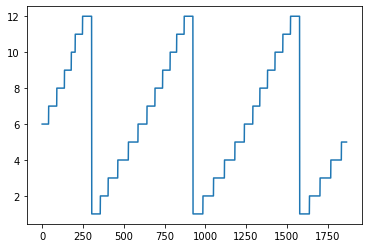

In [66]:
weather_df["month"].plot()

In [63]:
grouped_df = weather_df.groupby(["month"])

In [65]:
num_months = grouped_df.count()
num_months

,trans_id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,174,174,174,174,174,174
2,178,178,178,178,178,178
3,192,192,192,192,192,192
4,194,194,194,194,194,194
5,149,149,149,149,149,149
6,147,147,147,147,147,147
7,142,142,142,142,142,142
8,141,141,141,141,141,141
9,134,134,134,134,134,134


### How many Martian (and not Earth) days worth of data exist in the scraped dataset?

##### A: 1,867 individual days

In [28]:
len(weather_df["sol"].unique())

1867

### What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#### Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart.

##### A: Coldest Month - 3rd month; Warmest Month - 8th month

In [33]:
#weather_df

In [50]:
avg_temps = grouped_df["min_temp"].mean()
avg_temps.sort_values()

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

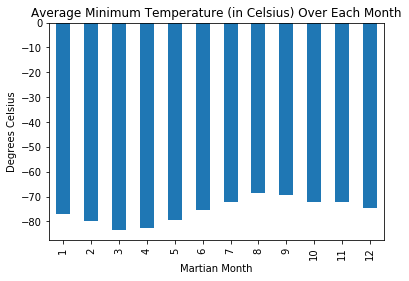

In [52]:
avg_temps.plot(kind="bar", title="Average Minimum Temperature (in Celsius) Over Each Month")
plt.ylabel("Degrees Celsius")
plt.xlabel("Martian Month")
plt.show()

### Which months have the lowest and the highest atmospheric pressure on Mars?
#### Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.

##### A: Lowest Atmospheric Pressure - 6th month; Highest Atmospheric Pressure - 9th month

In [42]:
avg_pressure = grouped_df["pressure"].mean()
avg_pressure.sort_values()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

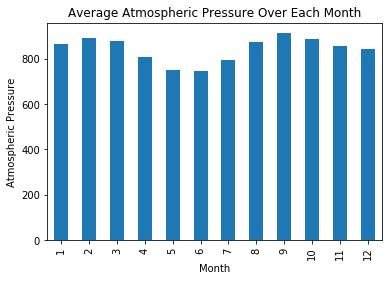

In [49]:
avg_pressure.plot(kind="bar", title="Average Atmospheric Pressure Over Each Month")
plt.ylabel("Atmospheric Pressure")
plt.xlabel("Martian Month")
plt.show()

### About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? 
#### Visually estimate the result by plotting the daily minimum temperature.

##### A: Approx. 675 Earth days are in one Martian year

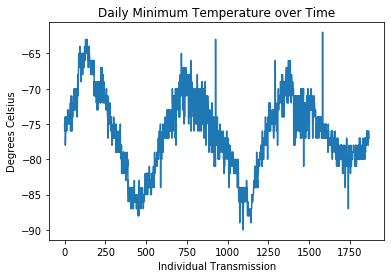

In [62]:
weather_df["min_temp"].plot(title="Daily Minimum Temperature over Time")
plt.xlabel("Individual Transmission")
plt.ylabel("Degrees Celsius")
plt.show()

In [58]:
1125-450

675